In [1]:
current_dir = %pwd
image_dir = current_dir + '/../images'
result_dir = current_dir + '/../results'
table_dir = current_dir + '/../tables'

In [96]:
from common import *
from scipy import stats
import os
import re
import json
import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import *
from itertools import *
import itertools
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
from collections import OrderedDict
%pylab inline
%matplotlib inline
#plt.style.use('ggplot')
print plt.style.available
plt.style.use('ggplot')
# Ever so slightly heavier
mpl.rcParams['lines.linewidth'] = 1.5

import tabulate as tab
for s in ['\\', '$', '%', '{', '}']:
    if s in tab.LATEX_ESCAPE_RULES:
        del tab.LATEX_ESCAPE_RULES[s]

Populating the interactive namespace from numpy and matplotlib
[u'grayscale', u'bmh', u'dark_background', u'ggplot', u'fivethirtyeight']


`%matplotlib` prevents importing * from pylab and numpy


In [97]:
game_names = {
    'ms_pacman': 'Ms. Pacman',
    'space_invaders': 'Space Invaders',
    'freeway': 'Freeway',
    'pong': 'Pong',
    'seaquest': 'Seaquest',
    'frostbite': 'Frostbite',
}
exp_re= re.compile('(?P<experiment>.*?)' +
               '([_-]+rep.(?P<rep>[0-9]+))?' +
               '([_-]+(?P<date>[0-9]{2}-[0-9]{2}.*?))?$')

In [104]:
from scipy import stats

def process_results(results, num_reps=None, num_epochs=100):
    if num_reps is None:
        num_reps = len(results)
    rewards = np.empty((num_reps, num_epochs))
    qs = np.empty((num_reps, num_epochs))
    for rep in range(num_reps):
        results[rep]
        rewards[rep, ...] = results[rep]['reward_per_episode'][:num_epochs]
        qs[rep, ...] = results[rep]['mean_q'][:num_epochs]
    return rewards, qs
            
def process_results_for_games(results, games, num_reps=5, num_epochs=100):
    rewards = np.empty((num_games, num_reps, num_epochs))
    qs = np.empty((num_games, num_reps, num_epochs))
    for game_i, game in enumerate(games):
        rewards[game_i], qs[game_i] = process_results(results[game], num_reps, num_epochs)
    return rewards, qs

def index_to_threshold(arr, threshold):
    idxs = np.argwhere(arr >= threshold)
    if idxs.size is 0:
        return -1
    return np.take(idxs, 0)

index_tt_arr = partial(np.apply_along_axis, index_to_threshold, 1)
tt_to_steps = lambda x: (x+1) * 50000

labelify = lambda labels: map(lambda l: l if int(l) < 1000 else str(int(l) / 1000) + 'k', labels)

In [112]:
single_base_dir = result_dir + '/single_frame'
base_dir = result_dir + '/base'
linear_dir = result_dir + '/linear'
single_learning, single_results, single_params = gather(single_base_dir)
base_learning, base_results, base_params = gather(base_dir)
linear_learning, linear_results, linear_params = gather(linear_dir)

phi_1-pong 
ms_pacman pong seaquest space_invaders 
linear_base-ms_pacman linear_base-pong linear_base-seaquest linear_base-space_invaders 


In [114]:
single_rewards, single_qs = process_results(single_results['phi_1-pong'])
single_rewards_err = stats.sem(single_rewards, axis=0)
single_rewards_mean = np.mean(single_rewards, axis=0)
single_qs_err = stats.sem(single_qs, axis=0)
single_qs_mean = np.mean(single_qs, axis=0)

# Mind you this is actually 200 epochs but don't need them all
base_rewards, base_qs = process_results(base_results['pong'])
base_rewards_err = stats.sem(base_rewards, axis=0)
base_rewards_mean = np.mean(base_rewards, axis=0)
base_qs_err = stats.sem(base_qs, axis=0)
base_qs_mean = np.mean(base_qs, axis=0)

base_rewards_tts = tt_to_steps(index_tt_arr(base_rewards, 10))
base_rewards_tts_mean = np.mean(base_rewards_tts)
base_rewards_tts_err = stats.sem(base_rewards_tts)

linear_rewards, linear_qs = process_results(linear_results['linear_base-pong'])
linear_rewards_err = stats.sem(linear_rewards, axis=0)
linear_rewards_mean = np.mean(linear_rewards, axis=0)
linear_qs_err = stats.sem(linear_qs, axis=0)
linear_qs_mean = np.mean(linear_qs, axis=0)

linear_rewards_tts = tt_to_steps(index_tt_arr(linear_rewards, 10))
linear_rewards_tts_mean = np.mean(linear_rewards_tts)
linear_rewards_tts_err = stats.sem(linear_rewards_tts)


## Frame Stacking

In [7]:
num_epochs = 100
num_reps = 5

base_boost_dir = result_dir + '/base_boost'
single_frame_boost_dir = result_dir + '/single_frame_boost'

base_boost_learning, base_boost_results, base_boost_params = gather(base_boost_dir)
single_boost_learning, single_boost_results, single_boost_params = gather(single_frame_boost_dir)

games = base_boost_results.keys()
num_games = len(games)

freeway ms_pacman pong seaquest space_invaders 
freeway ms_pacman pong seaquest space_invaders 


In [8]:
base_boost_rewards, base_boost_qs = process_results_for_games(base_boost_results, games)
single_boost_rewards, single_boost_qs = process_results_for_games(single_boost_results, games)

In [9]:
base_boost = None
print base_boost_rewards.shape
base_boost_rewards_err = stats.sem(base_boost_rewards, axis=1)
base_boost_rewards_mean = np.mean(base_boost_rewards, axis=1)
#base_boost_rewards_max = np.max(base_boost_rewards, axis=1)
#base_boost_rewards_min = np.min(base_boost_rewards, axis=1)
single_boost_rewards_err = stats.sem(single_boost_rewards, axis=1)
single_boost_rewards_mean = np.mean(single_boost_rewards, axis=1)

base_boost_qs_err = stats.sem(base_boost_qs, axis=1)
base_boost_qs_mean = np.mean(base_boost_qs, axis=1)
single_boost_qs_err = stats.sem(single_boost_qs, axis=1)
single_boost_qs_mean = np.mean(single_boost_qs, axis=1)


(5, 5, 100)


/home/ruben/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


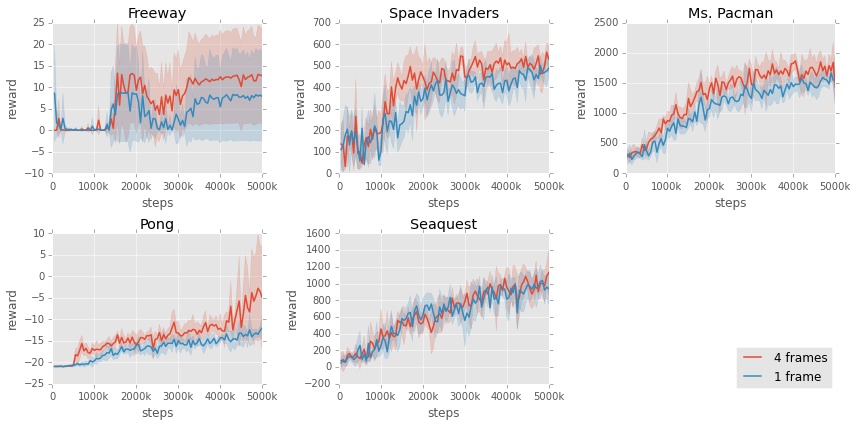

In [10]:
confidence = 0.9
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., num_reps-1)
s = partial(smoothing, window=5)
s = lambda x: x

epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

fig = plt.figure(figsize=(12,6))
lines = []
for game_i, game in enumerate(games):
    #base_ax = fig.add_subplot(num_games, 2, game_i * 2 + 1)
    #single_ax = fig.add_subplot(num_games, 2, game_i * 2 + 2)
    ax = fig.add_subplot(2, 3, game_i + 1)
    base_line, = ax.plot(steps, s(base_boost_rewards_mean[game_i]),
                        label='4 frames')
    ax.fill_between(steps, 
                    s(base_boost_rewards_mean[game_i]) - t * s(base_boost_rewards_err[game_i]),
                    s(base_boost_rewards_mean[game_i]) + t * s(base_boost_rewards_err[game_i]),
                    #base_boost_rewards_min[game_i],
                    #base_boost_rewards_max[game_i],
                    alpha=0.2,
                    color = base_line.get_color())
    single_line, = ax.plot(steps, single_boost_rewards_mean[game_i],
                          label='1 frame')
    ax.fill_between(steps, 
                s(single_boost_rewards_mean[game_i]) - t * s(single_boost_rewards_err[game_i]),
                s(single_boost_rewards_mean[game_i]) + t * s(single_boost_rewards_err[game_i]),
                alpha=0.2,
                color = single_line.get_color())
    ax.set_title(game_names[game])
    ax.set_xlabel('steps')
    ax.set_ylabel('reward')
    fig.canvas.draw()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labelify(labels))
    
    lines += [base_line, single_line]

fig.legend(lines, labels=['4 frames', '1 frame'], bbox_to_anchor=(.97, 0.2))
fig.tight_layout()
plt.savefig(image_dir + '/stacked_vs_single.pdf')

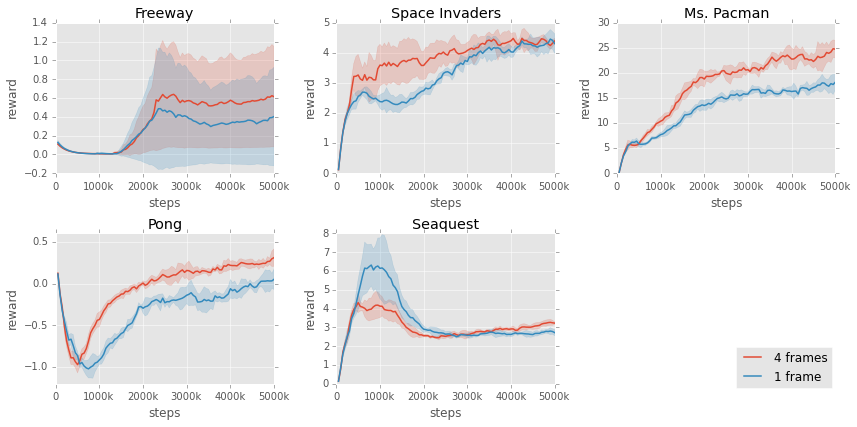

In [11]:
#s = partial(smoothing, window=3)
s = lambda x: x
fig = plt.figure(figsize=(12,6))
lines = []
for game_i, game in enumerate(games):
    #base_ax = fig.add_subplot(num_games, 2, game_i * 2 + 1)
    #single_ax = fig.add_subplot(num_games, 2, game_i * 2 + 2)
    ax = fig.add_subplot(2, 3, game_i + 1)
    base_line, = ax.plot(steps, s(base_boost_qs_mean[game_i]),
                        label='4 frames')
    ax.fill_between(steps, 
                    s(base_boost_qs_mean[game_i]) - t * s(base_boost_qs_err[game_i]),
                    s(base_boost_qs_mean[game_i]) + t * s(base_boost_qs_err[game_i]),
                    #base_boost_qs_min[game_i],
                    #base_boost_qs_max[game_i],
                    alpha=0.2,
                    color = base_line.get_color())
    single_line, = ax.plot(steps, s(single_boost_qs_mean[game_i]),
                          label='1 frame')
    ax.fill_between(steps, 
                s(single_boost_qs_mean[game_i]) - t * s(single_boost_qs_err[game_i]),
                s(single_boost_qs_mean[game_i]) + t * s(single_boost_qs_err[game_i]),
                alpha=0.2,
                color = single_line.get_color())
    ax.set_title(game_names[game])
    ax.set_xlabel('steps')
    ax.set_ylabel('reward')
    fig.canvas.draw()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labelify(labels))
    
    lines += [base_line, single_line]

fig.legend(lines, labels=['4 frames', '1 frame'], bbox_to_anchor=(.97, 0.2))
fig.tight_layout()
plt.savefig(image_dir + '/stacked_vs_single_qs.pdf')

## Late Fusion

## 3D Conv

In [12]:
conv3d_dir = result_dir + '/conv3d'

num_epochs = 100

conv3d_learning, conv3d_results, conv3d_params = gather(conv3d_dir)
conv3d = {k: process_results(v) for k, v in conv3d_results.iteritems()}
conv3d_rewards = {k: v[0] for k, v in conv3d.iteritems()}
conv3d_qs = {k: v[1] for k, v in conv3d.iteritems()}

for k,v in conv3d.iteritems():
    print k, '\t', v[0].shape

conv3d_2_2-pong conv3d_2_2_maxpool-pong conv3d_2_3-pong conv3d_3_1-pong conv3d_3_2-pong conv3d_rgb-pong 
conv3d_3_2-pong 	(3, 100)
conv3d_2_2-pong 	(3, 100)
conv3d_3_1-pong 	(3, 100)
conv3d_rgb-pong 	(3, 100)
conv3d_2_2_maxpool-pong 	(3, 100)
conv3d_2_3-pong 	(3, 100)


In [13]:
conv3d_rewards_mean = {k: np.mean(v, axis=0) for k, v in conv3d_rewards.iteritems()}
conv3d_qs_mean = {k: np.mean(v, axis=0) for k, v in conv3d_qs.iteritems()}
conv3d_rewards_err = {k: stats.sem(v, axis=0) for k, v in conv3d_rewards.iteritems()}
conv3d_qs_err = {k: stats.sem(v, axis=0) for k, v in conv3d_qs.iteritems()}

In [14]:
confidence = 0.9
num_reps=3
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., num_reps-1)
s = partial(smoothing, window=5)
#s = lambda x:x

conv3d_arch_to_label = {
    'conv3d_2_2-pong': '(2,2) 3D Conv',
    'conv3d_3_2-pong': '(3,2) 3D Conv',
    'conv3d_3_1-pong': '(3,1) 3D Conv',
    'conv3d_2_3-pong': '(2,3) 3D Conv',
    'conv3d_rgb-pong': '(2,2) RGB 3D Conv',
    'conv3d_2_2_maxpool-pong': '(2,2) Maxpool 3D Conv',
}
conv3d_arch_to_short_label = {
    'conv3d_2_2-pong': '(2,2)',
    'conv3d_3_2-pong': '(3,2)',
    'conv3d_3_1-pong': '(3,1)',
    'conv3d_2_3-pong': '(2,3)',
    'conv3d_rgb-pong': '(2,2) RGB',
    'conv3d_2_2_maxpool-pong': '(2,2) Maxpool',
}

[u'#E24A33', u'#348ABD', u'#988ED5', u'#777777', u'#FBC15E', u'#8EBA42', u'#FFB5B8']


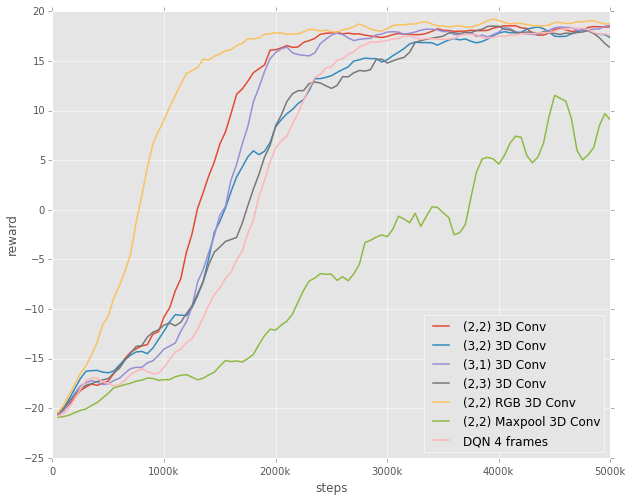

In [15]:
fig = plt.figure(figsize=(10,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000
print mpl.rcParams['axes.color_cycle']
ax = fig.add_subplot(111)
for exp in ['conv3d_2_2-pong', 'conv3d_3_2-pong', 'conv3d_3_1-pong',
           'conv3d_2_3-pong', 'conv3d_rgb-pong', 'conv3d_2_2_maxpool-pong']:
    ax.plot(steps, s(conv3d_rewards_mean[exp]),
           label=conv3d_arch_to_label[exp])

ax.plot(steps, s(base_rewards_mean), label='DQN 4 frames')
#ax.plot(steps, s(single_rewards_mean), label='DQN 1 frame')


fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labelify(labels))

ax.set_xlabel('steps')
ax.set_ylabel('reward')

plt.legend(loc='lower right')
plt.savefig(image_dir + '/conv3d_rewards.pdf')

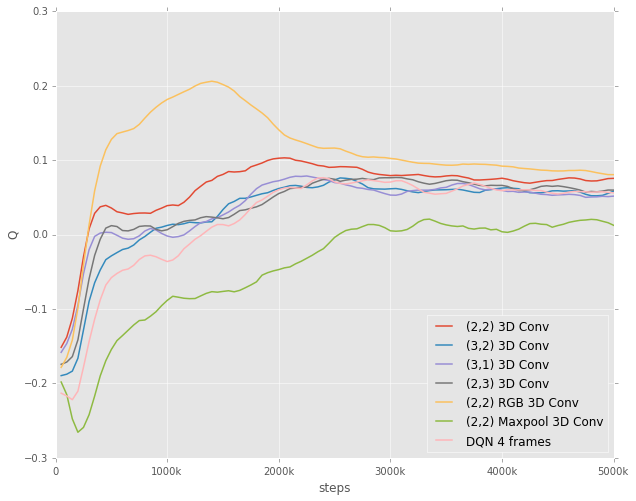

In [16]:
fig = plt.figure(figsize=(10,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

ax = fig.add_subplot(111)
for exp in ['conv3d_2_2-pong', 'conv3d_3_2-pong', 'conv3d_3_1-pong',
           'conv3d_2_3-pong', 'conv3d_rgb-pong', 'conv3d_2_2_maxpool-pong']:
    ax.plot(steps, s(conv3d_qs_mean[exp]),
           label=conv3d_arch_to_label[exp])
ax.plot(steps, s(base_qs_mean), label='DQN 4 frames')
#ax.plot(steps, s(single_qs_mean), label='DQN 1 frame')

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labelify(labels))

ax.set_xlabel('steps')
ax.set_ylabel('Q')

plt.legend(loc='lower right')
plt.savefig(image_dir + '/conv3d_qs.pdf')

In [17]:
conv3d_rewards_tts = {k: tt_to_steps(index_tt_arr(v, 10)) for k, v in conv3d_rewards.iteritems()}
# Max pool was being annoying
del conv3d_rewards_tts['conv3d_2_2_maxpool-pong']
conv3d_rewards_tts_mean = {k: np.mean(v) for k, v in conv3d_rewards_tts.iteritems()}
conv3d_rewards_tts_err = {k: stats.sem(v) for k, v in conv3d_rewards_tts.iteritems()}

table_tts = conv3d_rewards_tts.values() + [base_rewards_tts]
table_tts_mean = conv3d_rewards_tts_mean.values() + [base_rewards_tts_mean]
table_tts_err = conv3d_rewards_tts_err.values() + [base_rewards_tts_err]

table_tts_mean_err = zip(table_tts_mean, table_tts_err)

table_values = ['$\\num{{{0:.1e}}} \pm \\num{{{1:.1e}}}$'.format(mean, err)
                       for mean, err in table_tts_mean_err]
table_labels = [conv3d_arch_to_label[key] for key in conv3d_rewards_tts.keys()] + ['DQN-4']
table_short_labels = [conv3d_arch_to_short_label[key] for key in conv3d_rewards_tts.keys()] + ['DQN-4']

table = OrderedDict()
table['Architecture'] = table_labels
table['Steps to 10 reward'] = table_values
table_latex = tabulate(table, headers='keys', 
   tablefmt="latex")

with open(table_dir + '/conv3d_ttt.tex', 'w') as f:
    f.write(table_latex)
    
print table_latex

\begin{tabular}{ll}
\hline
 Architecture      & Steps to 10 reward                \\
\hline
 (3,2) 3D Conv     & $\num{1.6e+06} \pm \num{6.0e+04}$ \\
 (2,2) 3D Conv     & $\num{1.9e+06} \pm \num{4.1e+05}$ \\
 (3,1) 3D Conv     & $\num{1.7e+06} \pm \num{1.3e+05}$ \\
 (2,2) RGB 3D Conv & $\num{2.0e+06} \pm \num{2.4e+05}$ \\
 (2,3) 3D Conv     & $\num{1.0e+06} \pm \num{8.3e+04}$ \\
 DQN-4             & $\num{2.0e+06} \pm \num{2.9e+04}$ \\
\hline
\end{tabular}


In [18]:
num_reps = 3
num_exps = len(table_labels)
#a,b = list(itertools.product(table_tts, table_tts))[0]
#print a.shape
#stats.wilcoxon(a,b)

stats_results = [
    stats.ranksums(one[:num_reps], other[:num_reps]).pvalue for one, other in
    itertools.product(table_tts, table_tts)
]

stats_results = np.reshape(stats_results, (num_exps,num_exps))
#type(stats_results[0][0])
stats_table = np.empty((num_exps, num_exps+1), dtype='|S20')

for i, j in itertools.product(xrange(num_exps), xrange(num_exps)):
    stats_table[i, j+1] = '{0:.3f}'.format(stats_results[i,j]) if not np.isnan(stats_results[i,j]) else ''

for i in xrange(num_exps):
    stats_table[i, 0] = table_short_labels[i]
    
table_latex = tabulate(stats_table, headers=table_short_labels, tablefmt='latex')

with open(table_dir + '/conv3d_wilcoxon.tex', 'w') as f:
    f.write(table_latex)
    
print table_latex

\begin{tabular}{lrrrrrr}
\hline
           &   (3,2) &   (2,2) &   (3,1) &   (2,2) RGB &   (2,3) &   DQN-4 \\
\hline
 (3,2)     &   1     &   0.827 &   0.827 &        0.05 &   0.663 &   0.513 \\
 (2,2)     &   0.827 &   1     &   0.513 &        0.05 &   0.19  &   0.05  \\
 (3,1)     &   0.827 &   0.513 &   1     &        0.05 &   0.275 &   0.05  \\
 (2,2) RGB &   0.05  &   0.05  &   0.05  &        1    &   0.05  &   0.05  \\
 (2,3)     &   0.663 &   0.19  &   0.275 &        0.05 &   1     &   0.663 \\
 DQN-4     &   0.513 &   0.05  &   0.05  &        0.05 &   0.663 &   1     \\
\hline
\end{tabular}


## Late Fusion

In [48]:
late_fusion_dir = result_dir + '/late_fusion'

num_epochs = 100

late_fusion_learning, late_fusion_results, late_fusion_params = gather(late_fusion_dir)
late_fusion = {k: process_results(v) for k, v in late_fusion_results.iteritems()}
late_fusion_rewards = {k: v[0] for k, v in late_fusion.iteritems()}
late_fusion_qs = {k: v[1] for k, v in late_fusion.iteritems()}

for k,v in late_fusion.iteritems():
    print k, '\t', v[0].shape


late_fusion_4_noshare-pong late_fusion_4_rgb-pong late_fusion_4_share-pong 
late_fusion_4_share-pong 	(3, 100)
late_fusion_4_noshare-pong 	(3, 100)
late_fusion_4_rgb-pong 	(3, 100)


In [49]:
late_fusion_rewards_mean = {k: np.mean(v, axis=0) for k, v in late_fusion_rewards.iteritems()}
late_fusion_qs_mean = {k: np.mean(v, axis=0) for k, v in late_fusion_qs.iteritems()}
late_fusion_rewards_err = {k: stats.sem(v, axis=0) for k, v in late_fusion_rewards.iteritems()}
late_fusion_qs_err = {k: stats.sem(v, axis=0) for k, v in late_fusion_qs.iteritems()}

In [50]:
confidence = 0.95
num_reps=3
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., num_reps-1)
s = partial(smoothing, window=5)

lf_arch_to_label = {
    'late_fusion_4_noshare-pong': 'LF separate weights',
    'late_fusion_4_share-pong': 'LF shared weights',
    'late_fusion_4_rgb-pong': 'LF shared weights (RGB)',

}
lf_arch_to_short_label = {
    'late_fusion_4_noshare-pong': 'LF separate',
    'late_fusion_4_share-pong': 'LF shared',
    'late_fusion_4_rgb-pong': 'LF shared (RGB)',
}

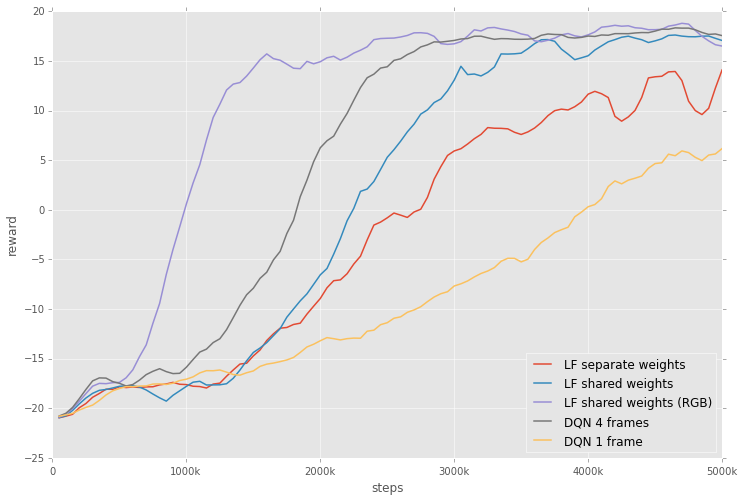

In [51]:
fig = plt.figure(figsize=(12,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

ax = fig.add_subplot(111)
ax.plot(steps, s(late_fusion_rewards_mean['late_fusion_4_noshare-pong']),
       label='LF separate weights')
ax.plot(steps, s(late_fusion_rewards_mean['late_fusion_4_share-pong']),
       label='LF shared weights')
ax.plot(steps, s(late_fusion_rewards_mean['late_fusion_4_rgb-pong']),
       label='LF shared weights (RGB)')
ax.plot(steps, s(base_rewards_mean), label='DQN 4 frames')
ax.plot(steps, s(single_rewards_mean), label='DQN 1 frame')

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labelify(labels))

ax.set_xlabel('steps')
ax.set_ylabel('reward')

plt.legend(loc='lower right')
plt.savefig(image_dir + '/late_fusion_pong_rewards.pdf')

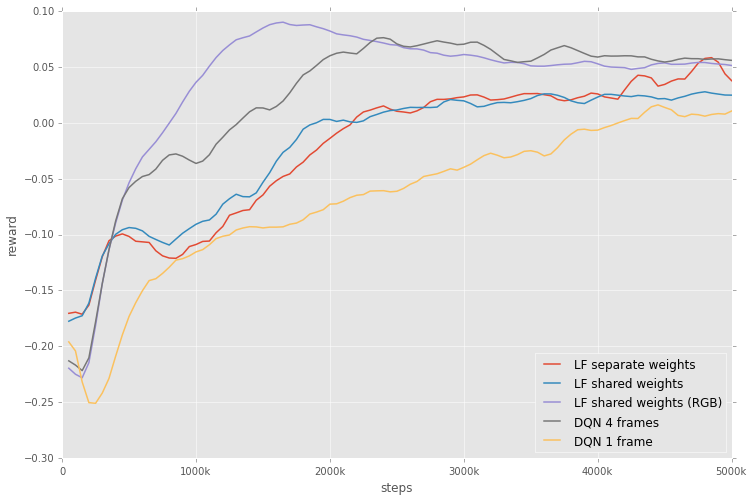

In [52]:
confidence = 0.9
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., num_reps-1)
s = partial(smoothing, window=5)
#s = lambda x:x

fig = plt.figure(figsize=(12,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

ax = fig.add_subplot(111)
ax.plot(steps, s(late_fusion_qs_mean['late_fusion_4_noshare-pong']),
       label='LF separate weights')
ax.plot(steps, s(late_fusion_qs_mean['late_fusion_4_share-pong']),
       label='LF shared weights')
ax.plot(steps, s(late_fusion_qs_mean['late_fusion_4_rgb-pong']),
       label='LF shared weights (RGB)')
ax.plot(steps, s(base_qs_mean), label='DQN 4 frames')
ax.plot(steps, s(single_qs_mean), label='DQN 1 frame')

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labelify(labels))

ax.set_xlabel('steps')
ax.set_ylabel('reward')

plt.legend(loc='lower right')
plt.savefig(image_dir + '/late_fusion_pong_qs.pdf')

In [53]:
lf_rewards_tts = {k: tt_to_steps(index_tt_arr(v, 10)) for k, v in late_fusion_rewards.iteritems()}
# Max pool was being annoying

lf_rewards_tts_mean = {k: np.mean(v) for k, v in lf_rewards_tts.iteritems()}
lf_rewards_tts_err = {k: stats.sem(v) for k, v in lf_rewards_tts.iteritems()}

table_tts = lf_rewards_tts.values() + [base_rewards_tts]
table_tts_mean = lf_rewards_tts_mean.values() + [base_rewards_tts_mean]
table_tts_err = lf_rewards_tts_err.values() + [base_rewards_tts_err]

table_tts_mean_err = zip(table_tts_mean, table_tts_err)

table_values = ['$\\num{{{0:.1e}}} \pm \\num{{{1:.1e}}}$'.format(mean, err)
                       for mean, err in table_tts_mean_err]
table_labels = [lf_arch_to_label[key] for key in lf_rewards_tts.keys()] + ['DQN-4']
table_short_labels = [lf_arch_to_short_label[key] for key in lf_rewards_tts.keys()] + ['DQN-4']

table = OrderedDict()
table['Architecture'] = table_labels
table['Steps to 10 reward'] = table_values
table_latex = tabulate(table, headers='keys', 
   tablefmt="latex")

with open(table_dir + '/lf_ttt.tex', 'w') as f:
    f.write(table_latex)
    
print table_latex


\begin{tabular}{ll}
\hline
 Architecture            & Steps to 10 reward                \\
\hline
 LF shared weights       & $\num{2.6e+06} \pm \num{2.0e+05}$ \\
 LF separate weights     & $\num{3.3e+06} \pm \num{5.9e+05}$ \\
 LF shared weights (RGB) & $\num{1.1e+06} \pm \num{7.3e+04}$ \\
 DQN-4                   & $\num{2.0e+06} \pm \num{2.9e+04}$ \\
\hline
\end{tabular}


In [54]:
num_reps = 3
num_exps = len(table_labels)
#a,b = list(itertools.product(table_tts, table_tts))[0]
#print a.shape
#stats.wilcoxon(a,b)

stats_results = [
    stats.ranksums(one[:num_reps], other[:num_reps]).pvalue for one, other in
    itertools.product(table_tts, table_tts)
]

stats_results = np.reshape(stats_results, (num_exps,num_exps))
#type(stats_results[0][0])
stats_table = np.empty((num_exps, num_exps+1), dtype='|S20')

for i, j in itertools.product(xrange(num_exps), xrange(num_exps)):
    stats_table[i, j+1] = '{0:.3f}'.format(stats_results[i,j]) if not np.isnan(stats_results[i,j]) else ''

for i in xrange(num_exps):
    stats_table[i, 0] = table_short_labels[i]
    
table_latex = tabulate(stats_table, headers=table_short_labels, tablefmt='latex')

with open(table_dir + '/lf_wilcoxon.tex', 'w') as f:
    f.write(table_latex)
    
print table_latex


\begin{tabular}{lrrrr}
\hline
                 &   LF shared &   LF separate &   LF shared (RGB) &   DQN-4 \\
\hline
 LF shared       &       1     &         0.275 &              0.05 &    0.05 \\
 LF separate     &       0.275 &         1     &              0.05 &    0.05 \\
 LF shared (RGB) &       0.05  &         0.05  &              1    &    0.05 \\
 DQN-4           &       0.05  &         0.05  &              0.05 &    1    \\
\hline
\end{tabular}


## LSTM

In [56]:
lstm_dir = result_dir + '/lstm'

num_epochs = 100

lstm_learning, lstm_results, lstm_params = gather(lstm_dir)
lstm = {k: process_results(v) for k, v in lstm_results.iteritems()}
lstm_rewards = {k: v[0] for k, v in lstm.iteritems()}
lstm_qs = {k: v[1] for k, v in lstm.iteritems()}

for k,v in lstm.iteritems():
    print k, '\t', v[0].shape

lstm_rewards_mean = {k: np.mean(v, axis=0) for k, v in lstm_rewards.iteritems()}
lstm_qs_mean = {k: np.mean(v, axis=0) for k, v in lstm_qs.iteritems()}
lstm_rewards_err = {k: stats.sem(v, axis=0) for k, v in lstm_rewards.iteritems()}
lstm_qs_err = {k: stats.sem(v, axis=0) for k, v in lstm_qs.iteritems()}


lstm_256_10_mine_fix-pong lstm_256_30_mine_fix-pong lstm_256_30_mine_fix_flicker-pong lstm_512_30_mine_fix-pong 
lstm_512_30_mine_fix-pong 	(2, 100)
lstm_256_10_mine_fix-pong 	(3, 100)
lstm_256_30_mine_fix_flicker-pong 	(2, 100)
lstm_256_30_mine_fix-pong 	(2, 100)


In [57]:
confidence = 0.95
num_reps=2
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., num_reps-1)
s = partial(smoothing, window=5)

lstm_arch_to_label = {
    'lstm_256_10_mine_fix-pong': 'LSTM (256 units; 10 unroll)',
    'lstm_256_30_mine_fix-pong': 'LSTM (256 units; 30 unroll)',
    'lstm_512_30_mine_fix-pong': 'LSTM (512 units; 30 unroll)',
}

lstm_arch_to_short_label = {
    'lstm_256_10_mine_fix-pong': 'LSTM (256; 10)',
    'lstm_256_30_mine_fix-pong': 'LSTM (256; 30)',
    'lstm_512_30_mine_fix-pong': 'LSTM (512; 30)',
}


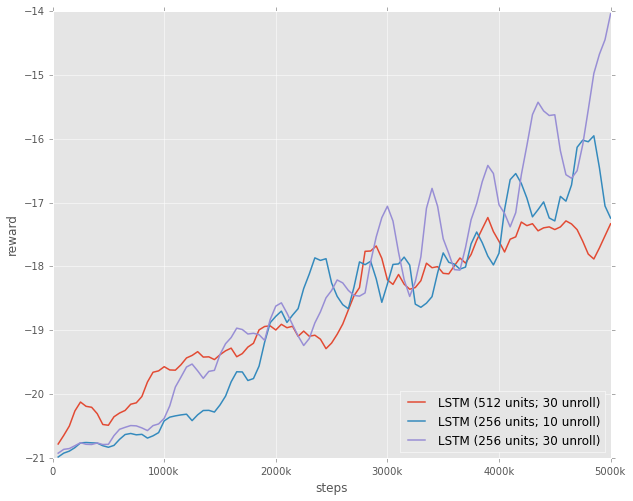

In [58]:
fig = plt.figure(figsize=(10,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

ax = fig.add_subplot(111)
for exp in lstm_arch_to_label.keys():
    ax.plot(steps, s(lstm_rewards_mean[exp]), label=lstm_arch_to_label[exp])

#ax.plot(steps, s(base_rewards_mean), label='DQN 4 frames')
#ax.plot(steps, s(single_rewards_mean), label='DQN 1 frame')

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labelify(labels))

ax.set_xlabel('steps')
ax.set_ylabel('reward')

plt.legend(loc='lower right')
plt.savefig(image_dir + '/lstm_rewards.pdf')

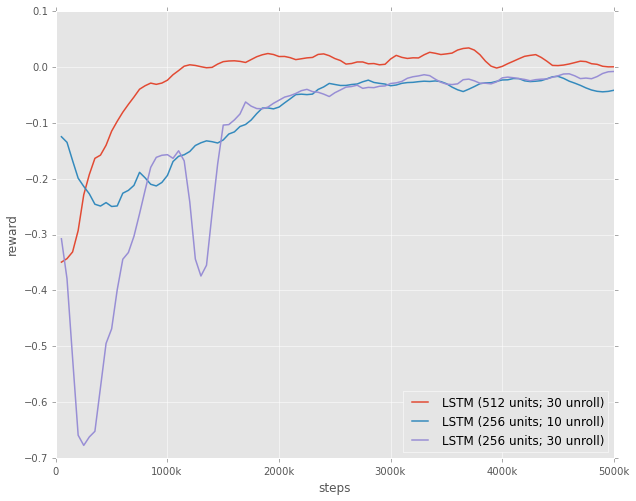

In [59]:
fig = plt.figure(figsize=(10,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

ax = fig.add_subplot(111)
for exp in lstm_arch_to_label.keys():
    ax.plot(steps, s(lstm_qs_mean[exp]), label=lstm_arch_to_label[exp])

#ax.plot(steps, s(base_rewards_mean), label='DQN 4 frames')
#ax.plot(steps, s(single_rewards_mean), label='DQN 1 frame')

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labelify(labels))

ax.set_xlabel('steps')
ax.set_ylabel('reward')

plt.legend(loc='lower right')
plt.savefig(image_dir + '/lstm_qs.pdf')

In [60]:
lf_rewards_tts = {k: tt_to_steps(index_tt_arr(v, 10)) for k, v in late_fusion_rewards.iteritems()}
# Max pool was being annoying

lf_rewards_tts_mean = {k: np.mean(v) for k, v in lf_rewards_tts.iteritems()}
lf_rewards_tts_err = {k: stats.sem(v) for k, v in lf_rewards_tts.iteritems()}

table_tts = lf_rewards_tts.values() + [base_rewards_tts]
table_tts_mean = lf_rewards_tts_mean.values() + [base_rewards_tts_mean]
table_tts_err = lf_rewards_tts_err.values() + [base_rewards_tts_err]

table_tts_mean_err = zip(table_tts_mean, table_tts_err)

table_values = ['$\\num{{{0:.1e}}} \pm \\num{{{1:.1e}}}$'.format(mean, err)
                       for mean, err in table_tts_mean_err]
table_labels = [lf_arch_to_label[key] for key in lf_rewards_tts.keys()] + ['DQN-4']
table_short_labels = [lf_arch_to_short_label[key] for key in lf_rewards_tts.keys()] + ['DQN-4']

table = OrderedDict()
table['Architecture'] = table_labels
table['Steps to 10 reward'] = table_values
table_latex = tabulate(table, headers='keys', 
   tablefmt="latex")

with open(table_dir + '/lf_ttt.tex', 'w') as f:
    f.write(table_latex)
    
print table_latex


\begin{tabular}{ll}
\hline
 Architecture            & Steps to 10 reward                \\
\hline
 LF shared weights       & $\num{2.6e+06} \pm \num{2.0e+05}$ \\
 LF separate weights     & $\num{3.3e+06} \pm \num{5.9e+05}$ \\
 LF shared weights (RGB) & $\num{1.1e+06} \pm \num{7.3e+04}$ \\
 DQN-4                   & $\num{2.0e+06} \pm \num{2.9e+04}$ \\
\hline
\end{tabular}


In [61]:
num_reps = 3
num_exps = len(table_labels)
#a,b = list(itertools.product(table_tts, table_tts))[0]
#print a.shape
#stats.wilcoxon(a,b)

stats_results = [
    stats.ranksums(one[:num_reps], other[:num_reps]).pvalue for one, other in
    itertools.product(table_tts, table_tts)
]

stats_results = np.reshape(stats_results, (num_exps,num_exps))
#type(stats_results[0][0])
stats_table = np.empty((num_exps, num_exps+1), dtype='|S20')

for i, j in itertools.product(xrange(num_exps), xrange(num_exps)):
    stats_table[i, j+1] = '{0:.3f}'.format(stats_results[i,j]) if not np.isnan(stats_results[i,j]) else ''

for i in xrange(num_exps):
    stats_table[i, 0] = table_short_labels[i]
    
table_latex = tabulate(stats_table, headers=table_short_labels, tablefmt='latex')

with open(table_dir + '/lf_wilcoxon.tex', 'w') as f:
    f.write(table_latex)
    
print table_latex


\begin{tabular}{lrrrr}
\hline
                 &   LF shared &   LF separate &   LF shared (RGB) &   DQN-4 \\
\hline
 LF shared       &       1     &         0.275 &              0.05 &    0.05 \\
 LF separate     &       0.275 &         1     &              0.05 &    0.05 \\
 LF shared (RGB) &       0.05  &         0.05  &              1    &    0.05 \\
 DQN-4           &       0.05  &         0.05  &              0.05 &    1    \\
\hline
\end{tabular}


## Combined

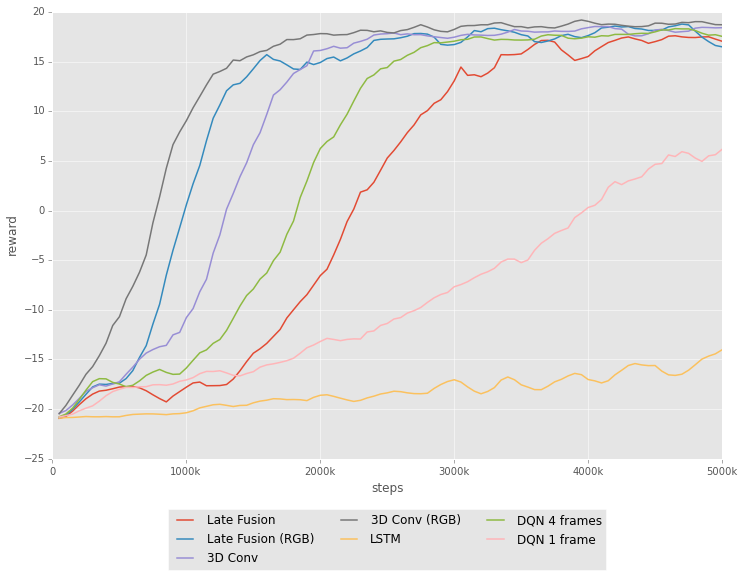

In [62]:
fig = plt.figure(figsize=(12,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

comb_arch_to_label = dict(
    lf_arch_to_label.items() + lstm_arch_to_label.items() + \
    conv3d_arch_to_label.items() + {
        'conv3d_2_2-pong': '3D Conv',
        'conv3d_rgb-pong': '3D Conv (RGB)',
        'lstm_256_30_mine_fix-pong': 'LSTM',
        'late_fusion_4_share-pong': 'Late Fusion',
        'late_fusion_4_rgb-pong': 'Late Fusion (RGB)',
        'linear-pong': 'Linear',
    }.items()
)

comb_arch_to_short_label = dict(
    lf_arch_to_short_label.items() + lstm_arch_to_short_label.items() + \
    conv3d_arch_to_short_label.items() + {
        'conv3d_2_2-pong': '3D Conv',
        'conv3d_rgb-pong': '3D Conv (RGB)',
        'lstm_256_30_mine_fix-pong': 'LSTM',
        'late_fusion_4_share-pong': 'LF',
        'late_fusion_4_rgb-pong': 'LF (RGB)',
        'linear-pong': 'Linear',
    }.items()
)


ax = fig.add_subplot(111)
for exp in ['late_fusion_4_share-pong', 'late_fusion_4_rgb-pong']:
    ax.plot(steps, s(late_fusion_rewards_mean[exp]), label=comb_arch_to_label[exp])

for exp in ['conv3d_2_2-pong', 'conv3d_rgb-pong']:
    ax.plot(steps, s(conv3d_rewards_mean[exp]), label=comb_arch_to_label[exp])
for exp in ['lstm_256_30_mine_fix-pong']:
    ax.plot(steps, s(lstm_rewards_mean[exp]), label=comb_arch_to_label[exp])

ax.plot(steps, s(base_rewards_mean), label='DQN 4 frames')
ax.plot(steps, s(single_rewards_mean), label='DQN 1 frame')
#ax.plot(steps, s(linear_rewards_mean), label='Linear')
    
#ax.plot(steps, s(base_rewards_mean), label='DQN 4 frames')
#ax.plot(steps, s(single_rewards_mean), label='DQN 1 frame')

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labelify(labels))

ax.set_xlabel('steps')
ax.set_ylabel('reward')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + 0.075, box.width * 1, box.height * 1])

# Put a legend to the right of the current axis
ax.tick_params(axis='both', which='both', top='off',
               right='off')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
         ncol=3)

plt.savefig(image_dir + '/combined_rewards.pdf')

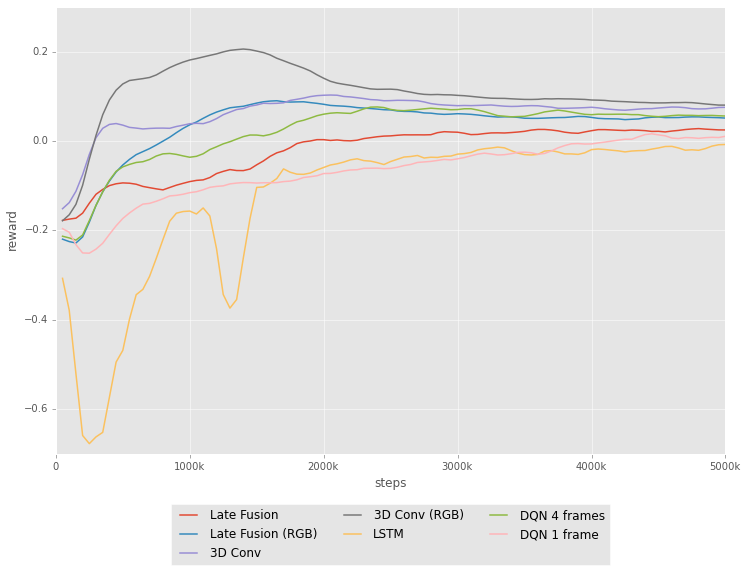

In [63]:
fig = plt.figure(figsize=(12,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

comb_arch_to_label = dict(
    lf_arch_to_label.items() + lstm_arch_to_label.items() + \
    conv3d_arch_to_label.items() + {
        'conv3d_2_2-pong': '3D Conv',
        'conv3d_rgb-pong': '3D Conv (RGB)',
        'lstm_256_30_mine_fix-pong': 'LSTM',
        'late_fusion_4_share-pong': 'Late Fusion',
        'late_fusion_4_rgb-pong': 'Late Fusion (RGB)',
        'linear-pong': 'Linear',
    }.items()
)

comb_arch_to_short_label = dict(
    lf_arch_to_short_label.items() + lstm_arch_to_short_label.items() + \
    conv3d_arch_to_short_label.items() + {
        'conv3d_2_2-pong': '3D Conv',
        'conv3d_rgb-pong': '3D Conv (RGB)',
        'lstm_256_30_mine_fix-pong': 'LSTM',
        'late_fusion_4_share-pong': 'LF',
        'late_fusion_4_rgb-pong': 'LF (RGB)',
        'linear-pong': 'Linear',
    }.items()
)


ax = fig.add_subplot(111)
for exp in ['late_fusion_4_share-pong', 'late_fusion_4_rgb-pong']:
    ax.plot(steps, s(late_fusion_qs_mean[exp]), label=comb_arch_to_label[exp])

for exp in ['conv3d_2_2-pong', 'conv3d_rgb-pong']:
    ax.plot(steps, s(conv3d_qs_mean[exp]), label=comb_arch_to_label[exp])
for exp in ['lstm_256_30_mine_fix-pong']:
    ax.plot(steps, s(lstm_qs_mean[exp]), label=comb_arch_to_label[exp])

ax.plot(steps, s(base_qs_mean), label='DQN 4 frames')
ax.plot(steps, s(single_qs_mean), label='DQN 1 frame')
#ax.plot(steps, s(linear_rewards_mean), label='Linear')
    
#ax.plot(steps, s(base_rewards_mean), label='DQN 4 frames')
#ax.plot(steps, s(single_rewards_mean), label='DQN 1 frame')

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labelify(labels))

ax.set_xlabel('steps')
ax.set_ylabel('reward')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + 0.075, box.width * 1, box.height * 1])

# Put a legend to the right of the current axis
ax.tick_params(axis='both', which='both', top='off',
               right='off')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
         ncol=3)

plt.savefig(image_dir + '/combined_qs.pdf')

In [34]:
arch_and_dict = [
    ('conv3d_2_2-pong', conv3d_rewards_mean),
    ('conv3d_rgb-pong', conv3d_rewards_mean),
    ('late_fusion_4_share-pong', late_fusion_rewards_mean),
    ('late_fusion_4_rgb-pong', late_fusion_rewards_mean),
]
comb_rewards = {
    'conv3d_2_2-pong': conv3d_rewards['conv3d_2_2-pong'],
    'conv3d_rgb-pong': conv3d_rewards['conv3d_2_2-pong'],
    'late_fusion_4_share-pong': late_fusion_rewards['late_fusion_4_share-pong'],
    'late_fusion_4_rgb-pong': late_fusion_rewards['late_fusion_4_rgb-pong'],
    #'lstm_256_30_mine_fix-pong': lstm_rewards['lstm_256_30_mine_fix-pong'],
}

comb_rewards_tts = {k: tt_to_steps(index_tt_arr(v, 10)) for k, v in comb_rewards.iteritems()}

comb_rewards_tts_mean = {k: np.mean(v) for k, v in comb_rewards_tts.iteritems()}
comb_rewards_tts_err = {k: stats.sem(v) for k, v in comb_rewards_tts.iteritems()}

table_tts = comb_rewards_tts.values() + [base_rewards_tts]
table_tts_mean = comb_rewards_tts_mean.values() + [base_rewards_tts_mean]
table_tts_err = comb_rewards_tts_err.values() + [base_rewards_tts_err]

table_tts_mean_err = zip(table_tts_mean, table_tts_err)

table_values = ['$\\num{{{0:.1e}}} \pm \\num{{{1:.1e}}}$'.format(mean, err)
                       for mean, err in table_tts_mean_err]
table_labels = [comb_arch_to_label[key] for key in comb_rewards_tts.keys()] + ['DQN-4']
table_short_labels = [comb_arch_to_short_label[key] for key in comb_rewards_tts.keys()] + ['DQN-4']

table = OrderedDict()
table['Architecture'] = table_labels
table['Steps to 10 reward'] = table_values
table_latex = tabulate(table, headers='keys', 
   tablefmt="latex")

with open(table_dir + '/comb_ttt.tex', 'w') as f:
    f.write(table_latex)
    
print table_latex


\begin{tabular}{ll}
\hline
 Architecture      & Steps to 10 reward                \\
\hline
 3D Conv           & $\num{1.6e+06} \pm \num{6.0e+04}$ \\
 Late Fusion       & $\num{1.1e+06} \pm \num{7.3e+04}$ \\
 3D Conv (RGB)     & $\num{1.6e+06} \pm \num{6.0e+04}$ \\
 Late Fusion (RGB) & $\num{2.6e+06} \pm \num{2.0e+05}$ \\
 DQN-4             & $\num{2.0e+06} \pm \num{2.9e+04}$ \\
\hline
\end{tabular}


In [35]:
num_reps = 3
num_exps = len(table_labels)
#a,b = list(itertools.product(table_tts, table_tts))[0]
#print a.shape
#stats.wilcoxon(a,b)

stats_results = [
    stats.ranksums(one[:num_reps], other[:num_reps]).pvalue for one, other in
    itertools.product(table_tts, table_tts)
]

stats_results = np.reshape(stats_results, (num_exps,num_exps))
#type(stats_results[0][0])
stats_table = np.empty((num_exps, num_exps+1), dtype='|S20')

for i, j in itertools.product(xrange(num_exps), xrange(num_exps)):
    stats_table[i, j+1] = '{0:.3f}'.format(stats_results[i,j]) if not np.isnan(stats_results[i,j]) else ''

for i in xrange(num_exps):
    stats_table[i, 0] = table_short_labels[i]
    
table_latex = tabulate(stats_table, headers=table_short_labels, tablefmt='latex')

with open(table_dir + '/comb_wilcoxon.tex', 'w') as f:
    f.write(table_latex)
    
print table_latex


\begin{tabular}{lrrrrr}
\hline
               &   3D Conv &   LF &   3D Conv (RGB) &   LF (RGB) &   DQN-4 \\
\hline
 3D Conv       &      1    & 0.05 &            1    &       0.05 &    0.05 \\
 LF            &      0.05 & 1    &            0.05 &       0.05 &    0.05 \\
 3D Conv (RGB) &      1    & 0.05 &            1    &       0.05 &    0.05 \\
 LF (RGB)      &      0.05 & 0.05 &            0.05 &       1    &    0.05 \\
 DQN-4         &      0.05 & 0.05 &            0.05 &       0.05 &    1    \\
\hline
\end{tabular}


## Flickering

In [69]:
flicker_dir = result_dir + '/flicker'
flicker_learning, flicker_results, flicker_params = gather(flicker_dir)

num_epochs = 100

flicker = {k: process_results(v) for k, v in flicker_results.iteritems()}
flicker_rewards = {k: v[0] for k, v in flicker.iteritems()}
flicker_qs = {k: v[1] for k, v in flicker.iteritems()}

for k,v in flicker.iteritems():
    print k, '\t', v[0].shape
    
flicker_rewards_mean = {k: np.mean(v, axis=0) for k, v in flicker_rewards.iteritems()}
flicker_qs_mean = {k: np.mean(v, axis=0) for k, v in flicker_qs.iteritems()}

base_10_flicker-pong base_flicker-pong conv3d_10_flicker-pong conv3d_4_flicker-pong late_fusion_10_flicker-pong late_fusion_4_flicker-pong lstm_100_original_flicker_.5-pong lstm_10_original_flicker_.5-pong 
late_fusion_10_flicker-pong 	(5, 100)
conv3d_10_flicker-pong 	(3, 100)
conv3d_4_flicker-pong 	(3, 100)
lstm_10_original_flicker_.5-pong 	(1, 100)
base_flicker-pong 	(5, 100)
base_10_flicker-pong 	(3, 100)
late_fusion_4_flicker-pong 	(6, 100)
lstm_100_original_flicker_.5-pong 	(1, 100)


In [70]:
confidence = 0.9
num_reps=3
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., num_reps-1)
s = partial(smoothing, window=5)
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

flicker_arch_to_label = {
    'late_fusion_10_flicker-pong': 'Late Fusion (10 frames)',
    'late_fusion_4_flicker-pong': 'Late Fusion (4 frames)',
    'conv3d_10_flicker-pong': '3D Conv (10 frames)',
    'conv3d_4_flicker-pong': '3D Conv (4 frames)',
    'base_flicker-pong': 'DQN (4 frames)',
    'base_10_flicker-pong': 'DQN (10 frames)',
}

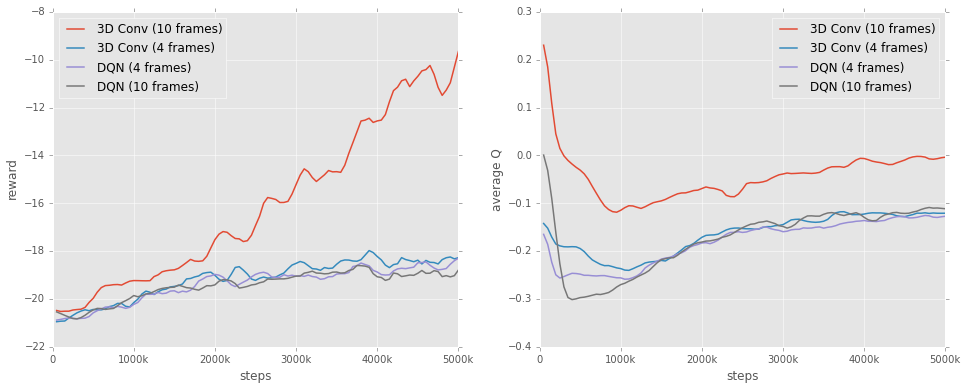

In [71]:
fig = plt.figure(figsize=(16,6))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

ax1 = fig.add_subplot(121)
ax = ax1
for exp in filter(lambda x: x.startswith('conv'), flicker_arch_to_label) + \
           filter(lambda x: x.startswith('base'), flicker_arch_to_label):
    ax.plot(steps, s(flicker_rewards_mean[exp]), label=flicker_arch_to_label[exp])

fig.canvas.draw()
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labelify(labels))
ax1.set_xlabel('steps')
ax1.set_ylabel('reward')
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(122)
ax = ax2
for exp in filter(lambda x: x.startswith('conv'), flicker_arch_to_label) + \
           filter(lambda x: x.startswith('base'), flicker_arch_to_label):
    ax.plot(steps, s(flicker_qs_mean[exp]), label=flicker_arch_to_label[exp])

fig.canvas.draw()
labels = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels(labelify(labels))
ax2.set_xlabel('steps')
ax2.set_ylabel('average Q')
ax2.legend(loc='upper right')

plt.savefig(image_dir + '/conv3d_flicker_both.pdf')

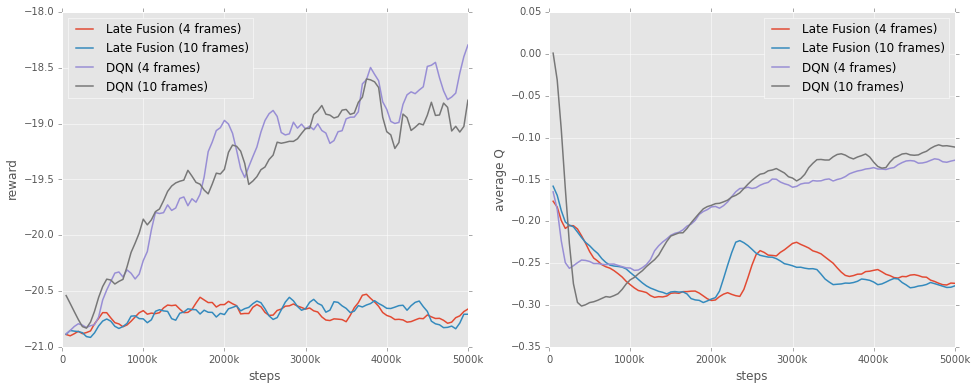

In [72]:
fig = plt.figure(figsize=(16,6))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

ax1 = fig.add_subplot(121)
ax = ax1
for exp in filter(lambda x: x.startswith('late'), flicker_arch_to_label) + \
           filter(lambda x: x.startswith('base'), flicker_arch_to_label):
    ax.plot(steps, s(flicker_rewards_mean[exp]), label=flicker_arch_to_label[exp])

fig.canvas.draw()
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labelify(labels))
ax1.set_xlabel('steps')
ax1.set_ylabel('reward')
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(122)
ax = ax2
for exp in filter(lambda x: x.startswith('late'), flicker_arch_to_label) + \
           filter(lambda x: x.startswith('base'), flicker_arch_to_label):
    ax.plot(steps, s(flicker_qs_mean[exp]), label=flicker_arch_to_label[exp])

fig.canvas.draw()
labels = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels(labelify(labels))
ax2.set_xlabel('steps')
ax2.set_ylabel('average Q')
ax2.legend(loc='upper right')

plt.savefig(image_dir + '/lf_flicker_both.pdf')

In [67]:
confidence = 0.9
num_reps=5
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., num_reps-1)
s = partial(smoothing, window=5)
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

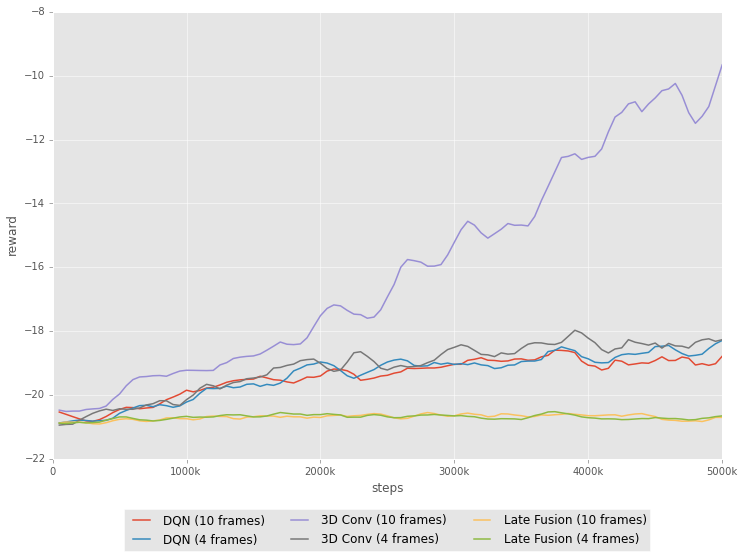

In [78]:
fig = plt.figure(figsize=(12,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

ax1 = fig.add_subplot(111)
ax = ax1
for exp in sorted(filter(lambda x: re.match(r'^(late)|(conv)|(base)', x), flicker_arch_to_label.keys())):
    ax.plot(steps, s(flicker_rewards_mean[exp]), label=flicker_arch_to_label[exp])

fig.canvas.draw()
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labelify(labels))
ax1.set_xlabel('steps')
ax1.set_ylabel('reward')
ax1.legend(loc='upper left')

ax1.set_position([box.x0, box.y0 + 0.075, box.width * 1, box.height * 1])

# Put a legend to the right of the current axis
ax1.tick_params(axis='both', which='both', top='off',
               right='off')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
         ncol=3)

plt.savefig(image_dir + '/comb_flicker_rewards.pdf')

## Extra

In [42]:
nn_dir = result_dir + '/nature_network'
nn_learning, nn_results, nn_params = gather(nn_dir)

num_epochs = 100

nn = {k: process_results(v) for k, v in nn_results.iteritems()}
nn_rewards = {k: v[0] for k, v in nn.iteritems()}
nn_qs = {k: v[1] for k, v in nn.iteritems()}

for k,v in nn.iteritems():
    print k, '\t', v[0].shape
    
nn_rewards_mean = {k: np.mean(v, axis=0) for k, v in nn_rewards.iteritems()}
nn_qs_mean = {k: np.mean(v, axis=0) for k, v in nn_qs.iteritems()}

pong space_invaders 
space_invaders 	(5, 100)
pong 	(5, 100)


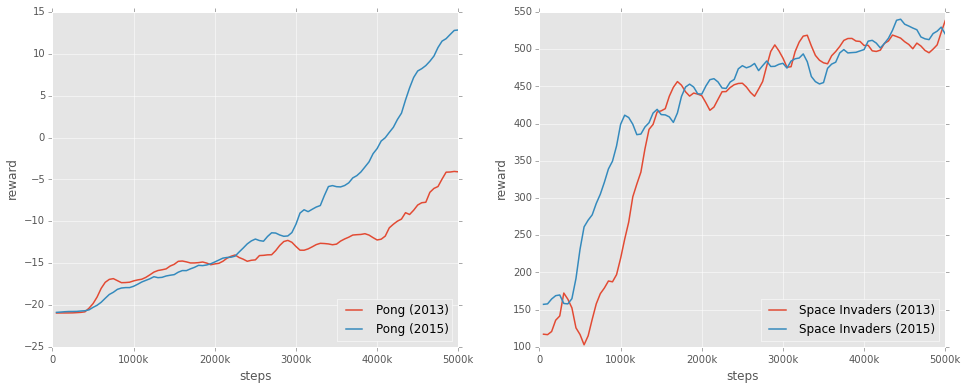

In [43]:
confidence = 0.9
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., num_reps-1)
s = partial(smoothing, window=5)

fig = plt.figure(figsize=(16,6))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

ax1 = fig.add_subplot(121)
ax1.plot(steps, s(base_boost_rewards_mean[3]),
       label='Pong (2013)')
ax1.plot(steps, s(nn_rewards_mean['pong']),
       label='Pong (2015)')

fig.canvas.draw()
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labelify(labels))
ax1.set_xlabel('steps')
ax1.set_ylabel('reward')
ax1.legend(loc='lower right')

ax2 = fig.add_subplot(122)
ax2.plot(steps, s(base_boost_rewards_mean[1]),
       label='Space Invaders (2013)')
ax2.plot(steps, s(nn_rewards_mean['space_invaders']),
       label='Space Invaders (2015)')

fig.canvas.draw()
labels = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels(labelify(labels))
ax2.set_xlabel('steps')
ax2.set_ylabel('reward')
ax2.legend(loc='lower right')

plt.savefig(image_dir + '/nips_vs_nature_rewards.pdf')

In [44]:
base_boost_rewards_mean[3]

array([-20.98064516, -20.94375   , -20.94354839, -20.93479263,
       -20.99375   , -20.94310345, -20.88435873, -20.78579523,
       -20.84656106, -20.63092396, -18.22169987, -18.49458689,
       -17.13516484, -15.62128205, -17.32857143, -16.74765235,
       -17.75040293, -17.8584707 , -16.77382284, -17.2009324 ,
       -16.93919192, -17.04260462, -17.02777778, -16.30424242,
       -16.05090909, -15.52372294, -15.64      , -16.1825974 ,
       -15.64444444, -15.1959596 , -13.60833333, -15.53269841,
       -14.1952381 , -15.48611111, -15.26161616, -14.34126984,
       -15.49333333, -14.12404762, -15.30365079, -15.9134127 ,
       -15.23777778, -14.23008658, -14.26666667, -14.63694084,
       -13.80634921, -13.8297619 , -13.5724026 , -16.75058275,
       -14.63357143, -14.47063492, -13.04071429, -14.97380952,
       -13.50793651, -14.51515152, -13.69642857, -13.34761905,
       -11.9952381 , -10.65357143, -13.095     , -13.165     ,
       -13.84642857, -13.78571429, -13.11904762, -13.16

In [132]:
freeze_dir = result_dir + '/freeze'
freeze_learning, freeze_results, freeze_params = gather(freeze_dir)

num_epochs = 100

freeze = {k: process_results(v) for k, v in freeze_results.iteritems()}
freeze_rewards = {k: v[0] for k, v in freeze.iteritems()}
freeze_qs = {k: v[1] for k, v in freeze.iteritems()}

for k,v in freeze.iteritems():
    print k, '\t', v[0].shape
    
freeze_rewards_mean = {k: np.mean(v, axis=0) for k, v in freeze_rewards.iteritems()}
freeze_qs_mean = {k: np.mean(v, axis=0) for k, v in freeze_qs.iteritems()}


freeze--1 freeze-100 freeze-5000 
freeze-100 	(1, 100)
freeze--1 	(1, 100)
freeze-5000 	(1, 100)


In [133]:
confidence = 0.95
num_reps=2
#factor for given confidence and number of trials
t = stats.t._ppf((1+confidence)/2., num_reps-1)
s = partial(smoothing, window=3)
s = lambda x: x

freeze_arch_to_label = OrderedDict(sorted({
    'freeze-100': 'swap every 100 updates',
    'freeze-5000': 'swap every 5000 updates',
    'freeze--1': 'never swap',
}.items(), reverse=True))

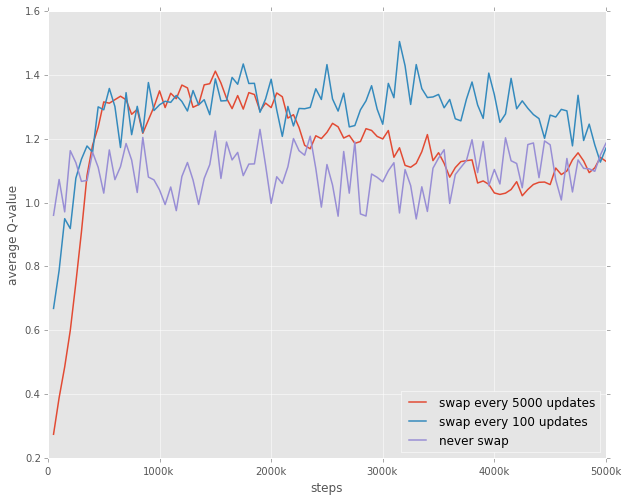

In [134]:
fig = plt.figure(figsize=(10,8))
epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000


ax = fig.add_subplot(111)
for exp in freeze_arch_to_label.keys():
    ax.plot(steps, s(freeze_qs_mean[exp]), label=freeze_arch_to_label[exp])

#ax.plot(steps, s(base_rewards_mean), label='DQN 4 frames')
#ax.plot(steps, s(single_rewards_mean), label='DQN 1 frame')

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labelify(labels))

ax.set_xlabel('steps')
ax.set_ylabel('average Q-value')

plt.legend(loc='lower right')
plt.savefig(image_dir + '/freeze_qs.pdf')

In [115]:
num_epochs = 85
print base_results.keys()
base = {k: process_results(v, None, num_epochs) for k, v in base_results.iteritems()}
base_rewards = {k: v[0] for k, v in base.iteritems()}
base_qs = {k: v[1] for k, v in base.iteritems()}

for k,v in base.iteritems():
    print k, '\t', v[0].shape
    
base_rewards_mean = {k: np.mean(v, axis=0) for k, v in base_rewards.iteritems()}
base_qs_mean = {k: np.mean(v, axis=0) for k, v in base_qs.iteritems()}


[u'space_invaders', u'ms_pacman', u'pong', u'seaquest']
space_invaders 	(5, 85)
ms_pacman 	(5, 85)
pong 	(5, 85)
seaquest 	(5, 85)


In [116]:
linear = {k: process_results(v, None, 85) for k, v in linear_results.iteritems()}
linear_rewards = {k: v[0] for k, v in linear.iteritems()}
linear_qs = {k: v[1] for k, v in linear.iteritems()}

for k,v in linear.iteritems():
    print k, '\t', v[0].shape
    
linear_rewards_mean = {k: np.mean(v, axis=0) for k, v in linear_rewards.iteritems()}
linear_qs_mean = {k: np.mean(v, axis=0) for k, v in linear_qs.iteritems()}


linear_base-ms_pacman 	(1, 85)
linear_base-seaquest 	(1, 85)
linear_base-pong 	(5, 85)
linear_base-space_invaders 	(1, 85)


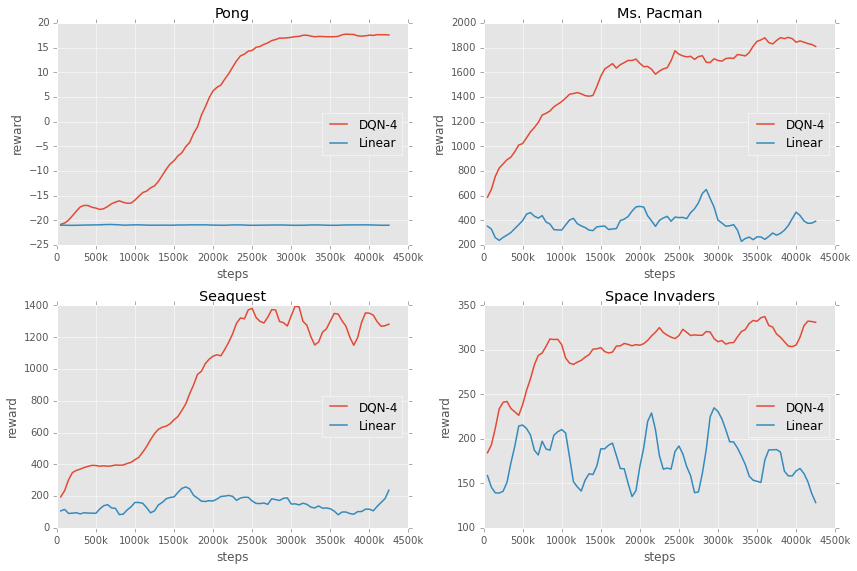

In [130]:
confidence = 0.9
s = partial(smoothing, window=5)
#s = lambda x: x

epochs = np.arange(1, num_epochs + 1)
steps = epochs * 50000

fig = plt.figure(figsize=(12,8))
lines = []
for game_i, game in enumerate(['pong', 'ms_pacman', 'seaquest', 'space_invaders']):
    #base_ax = fig.add_subplot(num_games, 2, game_i * 2 + 1)
    #single_ax = fig.add_subplot(num_games, 2, game_i * 2 + 2)
    ax = fig.add_subplot(2, 2, game_i + 1)
    base_line, = ax.plot(steps, s(base_rewards_mean[game]),
                        label='DQN-4')
    # ax.fill_between(steps,
    #                 s(base_boost_rewards_mean[game_i]) - t * s(base_boost_rewards_err[game_i]),
    #                 s(base_boost_rewards_mean[game_i]) + t * s(base_boost_rewards_err[game_i]),
    #                 #base_boost_rewards_min[game_i],
    #                 #base_boost_rewards_max[game_i],
    #                 alpha=0.2,
    #                 color = base_line.get_color())
    linear_line, = ax.plot(steps, s(linear_rewards_mean['linear_base-' + game]),
                          label='Linear')
    # ax.fill_between(steps,
    #             s(single_boost_rewards_mean[game_i]) - t * s(single_boost_rewards_err[game_i]),
    #             s(single_boost_rewards_mean[game_i]) + t * s(single_boost_rewards_err[game_i]),
    #             alpha=0.2,
    #             color = single_line.get_color())
    ax.set_title(game_names[game])
    ax.set_xlabel('steps')
    ax.set_ylabel('reward')
    fig.canvas.draw()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labelify(labels))
    ax.legend(loc='center right')

    lines += [base_line, linear_line]
    
fig.tight_layout()
plt.savefig(image_dir + '/dqn_vs_linear.pdf')
